# The Perceptron

This notebook implements the *perceptron*, a single neural model. It is an supervised learning algorithm for binary classification.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the hawks dataset into a pandas DataFrame object
df = pd.read_csv("Data/hawks.csv")
df = df[["Species", "Wing", "Tail"]].dropna(axis=0)
df

,Species,Wing,Tail
0,RT,385.0,219
1,RT,376.0,221
2,RT,381.0,235
3,CH,265.0,220
4,SS,205.0,157
...,...,...,...
903,RT,380.0,224
904,SS,190.0,150
905,RT,360.0,211
906,RT,369.0,207


In [22]:
# Store the desired species values in the numpy array y
y = df.Species.values
#y = df.iloc[0:100].Species.values

# Convert each entry of y with RT (red-tailed) to -1 and otherwise 1
y = np.where(y == 'RT', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["Wing", "Tail"]].values
#X = df[["Wing", "Tail"]].iloc[:100].values

In [8]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [29]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 10_000) # takes approximately 2 minutes with 10,000 epochs!

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

In [30]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

print(sum(y == y_hat) / len(y))

[ True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True False False False  True  True  True  True  True  True
  True  True  True  True False  True  True False False  True  True  True
 False  True  True  True False  True False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False  True  True  True  True  True  True  True  True  True  True
  True False False False False  True False False  True  True False False
  True  True False False  True  True  True  True  True  True  True  True
 False False  True  True False  True  True False False False  True  True
  True  True  True  True  True  True  True  True False False False False
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True False False  True  True  True  T

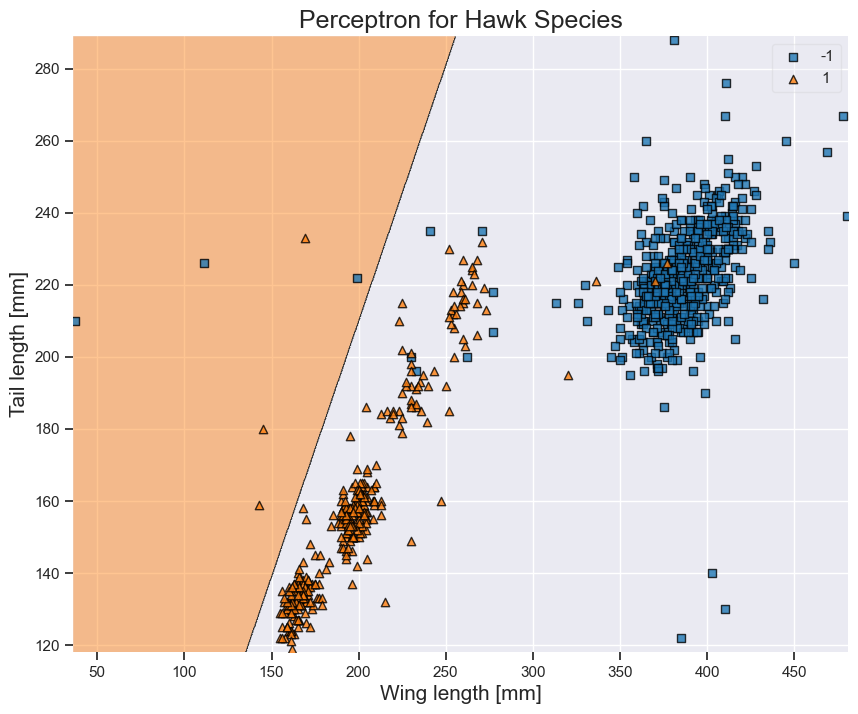

In [32]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("Perceptron for Hawk Species", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.show()

### Misclassifications Plot

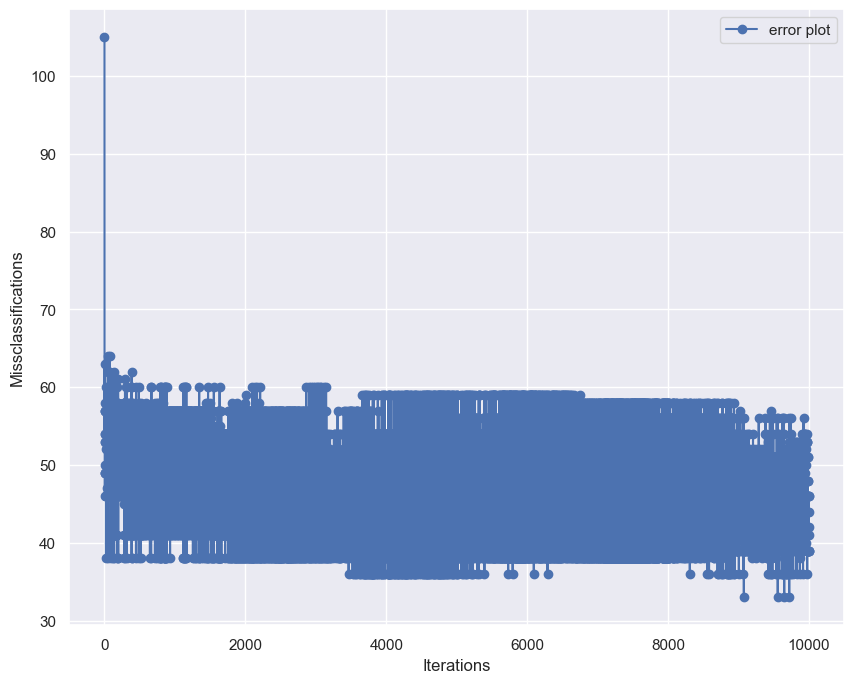

In [33]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()